In [218]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

Read Data

In [219]:
path = "../../data/"
file_name = path + "Carbon-Data-ALPIDE-CHIP-Longitudinal/151218_04237.csv"
conv = {"column": lambda vol: vol.strip("[]").split(";"),
        "row": lambda vol: vol.strip("[]").split(";")}
df = pd.read_csv(file_name, converters=conv)

In [220]:
df.head()

,ru_id,frame_id,stave_id,chip_id,abs_time,bunch_counter,column,row
0,1,1.0,0,5,3.949260e+09,54,"[1, 1, 0, 0, 1, 1, 2, 3, 4, 4, 5, 5, 7, 7, 7, ...","[48, 239, 263, 297, 305, 370, 332, 433, 250, 3..."
1,1,2.0,0,5,3.949380e+09,154,"[1, 1, 0, 0, 1, 1, 2, 3, 4, 4, 5, 5, 7, 7, 7, ...","[48, 239, 263, 297, 305, 370, 332, 433, 250, 3..."
2,1,3.0,0,5,3.949500e+09,64,"[1, 1, 0, 0, 1, 1, 2, 3, 4, 4, 5, 5, 7, 7, 7, ...","[48, 239, 263, 297, 305, 370, 332, 433, 250, 3..."
3,1,6.0,0,5,3.949860e+09,106,[829],[478]
4,1,14.0,0,5,3.950820e+09,11,"[957, 957, 958, 958]","[421, 422, 421, 422]"


Dataframe describe

In [221]:
df.describe()

,ru_id,frame_id,stave_id,chip_id,abs_time,bunch_counter
count,4960.0,4.960000e+03,4960.0,4960.0,4.960000e+03,4960.000000
mean,1.0,5.620522e+07,0.0,5.0,2.058590e+09,116.111492
std,0.0,3.745109e+07,0.0,0.0,1.207692e+09,69.589795
min,1.0,1.000000e+00,0.0,5.0,9.022900e+04,0.000000
25%,1.0,2.303950e+07,0.0,5.0,1.161115e+09,57.000000
50%,1.0,5.519960e+07,0.0,5.0,2.078060e+09,113.000000
75%,1.0,8.220050e+07,0.0,5.0,3.117590e+09,174.000000
max,1.0,1.294870e+08,0.0,5.0,4.294940e+09,255.000000


Check what values are in the each column
* Look at the values.
* make a brief hypothesis.

In [222]:
df['ru_id'].unique()

array([1], dtype=int64)

* 'ru_id' column has only value '1'.
* This value looks not important.

In [223]:
df['frame_id'].unique()

array([1.00000e+00, 2.00000e+00, 3.00000e+00, ..., 1.29484e+08,
       1.29486e+08, 1.29487e+08])

* 'frame_id' column has a lot of values.
* Still, I don't know what these data mean.

In [224]:
df['stave_id'].unique()

array([0], dtype=int64)

* 'ru_id' column has only value '0'.
* This value looks not important.

In [225]:
df['chip_id'].unique()

array([5], dtype=int64)

* 'ru_id' column has only value '5'.
* This value looks not important.

In [226]:
df['abs_time'].unique()

array([3.94926e+09, 3.94938e+09, 3.94950e+09, ..., 2.65462e+09,
       2.65474e+09, 2.65498e+09])

* This value has a lot of data.
* We can expect from column name that this value indicates the time.

In [227]:
df['bunch_counter'].unique()

array([ 54, 154,  64, 106,  11,  82, 100,   9, 222, 183, 244,  63, 110,
        24, 237, 190, 242, 137, 203, 151,   8, 217,  60, 122, 178, 235,
       239,  92, 135, 196, 149,   6, 158,   1,  53, 128, 189, 194,  69,
       105, 162, 114,  37,  80,  42,  94, 155, 102, 116, 159, 125, 238,
       181,  91, 191, 134, 243, 247,  57, 218, 227,  84,  98,  41, 140,
        68, 163,  25, 229, 147, 208, 226, 169, 231,  88, 131, 144, 165,
        13,  74,  79, 187,  49,  20, 171, 133, 185,  38,  47, 103,  22,
        30,  39, 101,  44,  19, 166,  71,  33, 146,  93,  55, 177,  87,
       236, 179,  50, 202,  59,  73, 115, 167,  86,   0, 108, 170, 113,
        83, 206,  77, 124,  43,  52, 212, 112, 182,  90,  65,  26, 252,
       157,  76,  75, 193,   3,   7, 168,  35, 143, 204, 161, 132, 141,
        97, 224, 176,  95,  99,  45, 201, 210, 219,  15, 129, 233,  31,
       117, 121, 225, 175, 107,  21, 172, 111,  72, 186, 251, 109,  66,
        61, 126,  36, 153, 120, 199, 104, 255, 230, 214, 232, 18

* This column has a lot of data.
* Still, I don't know what these data mean.

In [228]:
df['column']

0       [1, 1, 0, 0, 1, 1, 2, 3, 4, 4, 5, 5, 7, 7, 7, ...
1       [1, 1, 0, 0, 1, 1, 2, 3, 4, 4, 5, 5, 7, 7, 7, ...
2       [1, 1, 0, 0, 1, 1, 2, 3, 4, 4, 5, 5, 7, 7, 7, ...
3                                                   [829]
4                                    [957, 957, 958, 958]
                              ...                        
4955                                           [232, 232]
4956                                      [975, 974, 974]
4957                                                [866]
4958    [305, 307, 306, 307, 307, 306, 306, 307, 306, ...
4959                                           [767, 768]
Name: column, Length: 4960, dtype: object

* This column has a lot of data.
* Still, I don't know what these data mean.

In [229]:
df['row']

0       [48, 239, 263, 297, 305, 370, 332, 433, 250, 3...
1       [48, 239, 263, 297, 305, 370, 332, 433, 250, 3...
2       [48, 239, 263, 297, 305, 370, 332, 433, 250, 3...
3                                                   [478]
4                                    [421, 422, 421, 422]
                              ...                        
4955                                           [408, 409]
4956                                         [69, 69, 70]
4957                                                [346]
4958    [250, 247, 248, 248, 249, 249, 250, 250, 251, ...
4959                                             [59, 59]
Name: row, Length: 4960, dtype: object

* This column has a lot of data.
* Still, I don't know what these data mean.

I decided to drop 'ru_id', 'stave_id', 'chip_id' columns.

In [230]:
df.drop(['ru_id', 'stave_id', 'chip_id'], axis="columns", inplace=True)

* Each row has 'column' and 'row' feature.
* I can make a picture of protons with 'column' and 'row'
* The graph below is for 6data in head and 6data in tail

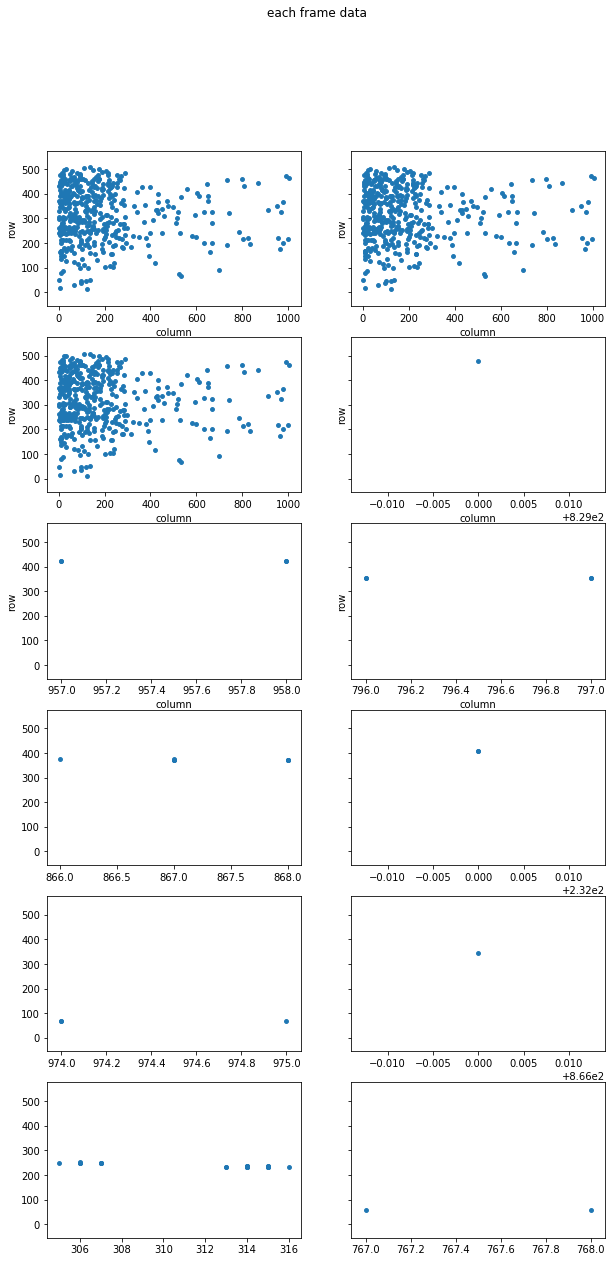

In [231]:
fig,ax = plt.subplots(6,2,sharey=True)
plt.suptitle("each frame data")
i=0
j=0

while i < 6:
    row_df = df.iloc[i,:]
    column = row_df['column']
    column = list(map(float,column))
    row = row_df['row']
    row = list(map(float,row))
    ax[int(i/2)][i%2].scatter(column,row, s=15)
    ax[int(i/2)][i%2].set_xlabel("column")
    ax[int(i/2)][i%2].set_ylabel("row")
    i = i + 1
i = i - 1
while i >= 0:
    row_df = df.iloc[4959-i,:]
    column = row_df['column']
    column = list(map(float,column))
    row = row_df['row']
    row = list(map(float,row))
    ax[5-int(i/2)][1-(i%2)].scatter(column,row, s=15)
    i = i - 1
fig.set_size_inches(10,20)
plt.show()

* Still, I can't find what this graph want to show.
* I will research more things about it.

Make lists of 'column' and 'row' data into each column.

In [232]:
def listcolumn_to_rows(df, explode):
    idx = df.index.repeat(df[explode[0]].str.len())
    df1 = pd.concat([
        pd.DataFrame({x: np.concatenate(df[x].values)}) for x in explode], axis=1)
    df1.index = idx
    return df1.join(df.drop(explode, 1), how='left').reset_index(drop=True)

df = listcolumn_to_rows(df, ['column', 'row'])

Make 'column' and 'row' into float data.

In [233]:
df = df.apply(pd.to_numeric)

In [234]:
df.head()

* If you see the data - 'abs_time', it is getting bigger except 2 values.
* I can assume that there are three time reversals.
* I assumed that three time reversals mean three independent examine.

     column  row  frame_id      abs_time  bunch_counter
0         1   48       1.0  3.949260e+09             54
1         1  239       1.0  3.949260e+09             54
2         0  263       1.0  3.949260e+09             54
3         0  297       1.0  3.949260e+09             54
4         1  305       1.0  3.949260e+09             54
...     ...  ...       ...           ...            ...
1992    331  267    2854.0  4.291620e+09            144
1993    221  187    2870.0  4.293540e+09            210
1994    220  187    2870.0  4.293540e+09            210
1995    220  188    2870.0  4.293540e+09            210
1996    221  188    2870.0  4.293540e+09            210

[1997 rows x 5 columns]
Time reversals :  1997 th row abs_time:  4293540000.0  ->  737507.0
        column  row    frame_id      abs_time  bunch_counter
1997        77  232      2888.0  7.375070e+05            219
1998        78  232      2888.0  7.375070e+05            219
1999        78  233      2888.0  7.375070e+05       

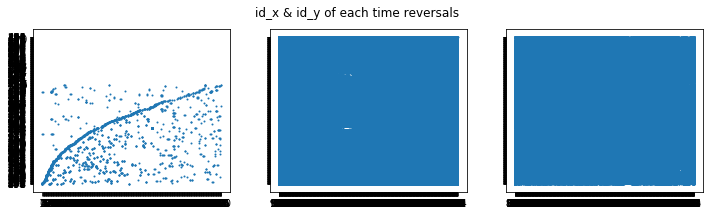

In [235]:
i = 0
j = 0
abstime = 0
num = 0

fig,ax = plt.subplots(1,3, sharey=True)
plt.suptitle("id_x & id_y of each time reversals")

while i < 2094546:
    temp = abstime
    row_df = df.iloc[i,:]
    abstime = row_df['abs_time']
    if temp > abstime:
        a = df.iloc[j:i,:]
        j = i
        ax[num].scatter(a['column'],a['row'],s=1)
        num = num + 1
        print(a)
        print("Time reversals : ",i, "th row abs_time: ", temp, " -> ", abstime)
    i = i + 1

print("number of the time reversals: ",num)
plt.xticks(np.arange(a['column'].min(), a['column'].max(),step=5))
fig.set_size_inches(12,3)
plt.show()

* I divided data from time reversal sections.
* But as we can see from the graph, the time reversal doesn't mean different examine.